In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)

In [2]:
# color = plt.get_cmap('RdYlGn')
# color.set_bad('lightblue')
# h_map = sns.heatmap(data=cor_mat, annot=True, cmap=color)

color_map = sns.color_palette("light:#00700c", as_cmap=True)
color_map.set_bad('black')

### SQUAD

In [3]:
data_squad_vs = [[86.19,0.84,0.99,2.49,0.0037,0.34],
                [51.33,0.82,0.32,2.41,0.0041,0.33],
                [55.93,0.81,0.04,2.41,0.0059,0.33]]
                
index_col = ['squad_squad', 'squad_trivia', 'squad_news']
data_squad_vs = pd.DataFrame(columns=['Acc', 'Cosine', 'Mauve', 'WMD', 'Wstn', 'JSD'], 
                  index=index_col,
                  data=data_squad_vs)
data_squad_vs

,Acc,Cosine,Mauve,WMD,Wstn,JSD
squad_squad,86.19,0.84,0.99,2.49,0.0037,0.34
squad_trivia,51.33,0.82,0.32,2.41,0.0041,0.33
squad_news,55.93,0.81,0.04,2.41,0.0059,0.33


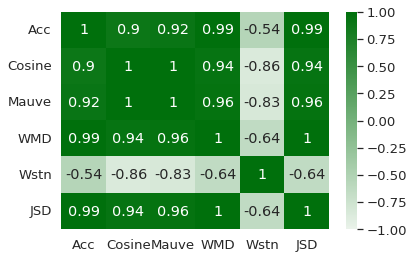

In [4]:
sns.heatmap(data_squad_vs.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

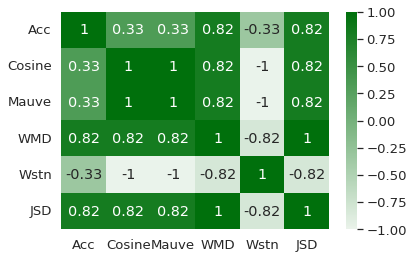

In [5]:
# kendall correlation
sns.heatmap(data_squad_vs.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

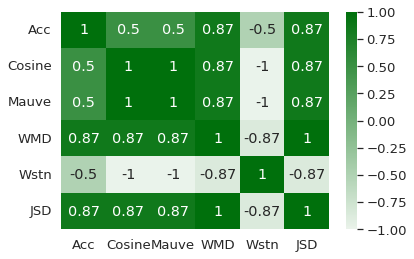

In [6]:
# spearman correlation
sns.heatmap(data_squad_vs.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)

###NEWS

In [7]:
data_news_vs = [[66.25,0.89,0.91,2.15,0.0036,0.23],
               [77.9,0.86,0.11,2.46,0.0046,0.31],
               [56.99,0.84,0.89,2.24,0.0039,0.27]]
               
index_col = ['news_news', 'news_squad', 'news_trivia']
data_news_vs = pd.DataFrame(columns=['Acc', 'Cosine', 'Mauve', 'WMD', 'Wstn', 'JSD'], 
                  index=index_col,
                  data=data_news_vs)
data_news_vs

,Acc,Cosine,Mauve,WMD,Wstn,JSD
news_news,66.25,0.89,0.91,2.15,0.0036,0.23
news_squad,77.90,0.86,0.11,2.46,0.0046,0.31
news_trivia,56.99,0.84,0.89,2.24,0.0039,0.27


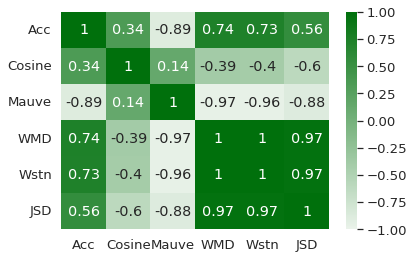

In [8]:
sns.heatmap(data_news_vs.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

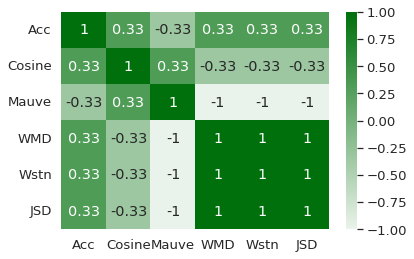

In [9]:
# kendall correlation
sns.heatmap(data_news_vs.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

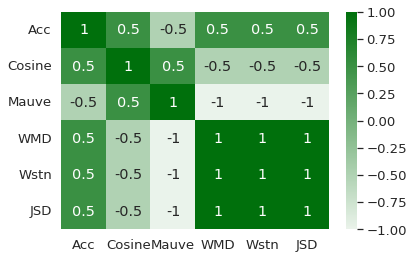

In [10]:
# spearman correlation
sns.heatmap(data_news_vs.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)

###Trivia

In [11]:
data_trivia_vs = [[66.95,0.88,0.99,2.2,0.0031,0.23],
                [52.59,0.82,0.04,2.44,0.0062,0.34],
                [31.24,0.82,0.99,2.18,0.0042,0.29]]

index_col = ['trivia_trivia', 'trivia_squad', 'trivia_news']
data_trivia_vs = pd.DataFrame(columns=['Acc', 'Cosine', 'Mauve', 'WMD', 'Wstn', 'JSD'], 
                  index=index_col,
                  data=data_trivia_vs)
data_trivia_vs

,Acc,Cosine,Mauve,WMD,Wstn,JSD
trivia_trivia,66.95,0.88,0.99,2.20,0.0031,0.23
trivia_squad,52.59,0.82,0.04,2.44,0.0062,0.34
trivia_news,31.24,0.82,0.99,2.18,0.0042,0.29


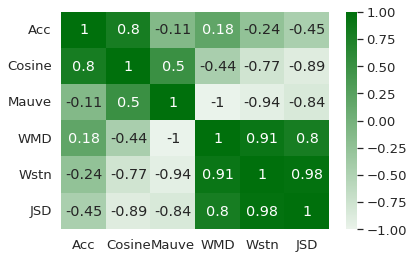

In [12]:
sns.heatmap(data_trivia_vs.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

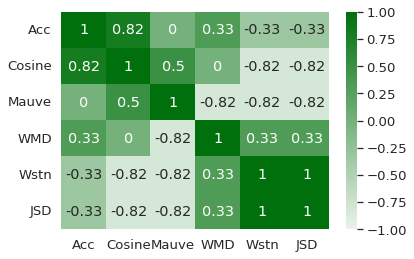

In [13]:
# kendall correlation
sns.heatmap(data_trivia_vs.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

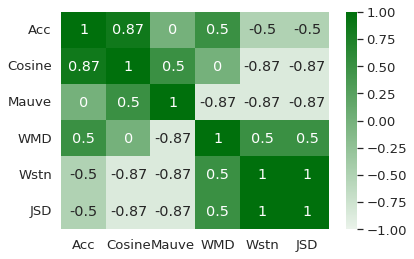

In [14]:
# spearman correlation
sns.heatmap(data_trivia_vs.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)

##Average

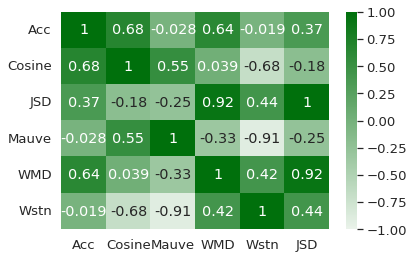

In [15]:
# Pearson Correlation
def average_of_all_three(df_1, df_2, df_3, corr):        
    df_concat = pd.concat((df_1.corr(method=corr), df_2.corr(method=corr)))
    by_row_index = df_concat.groupby(df_concat.index)
    df_first_two_sum = by_row_index.sum()

    df_concat = pd.concat((df_first_two_sum, df_3.corr(method=corr)))
    by_row_index = df_concat.groupby(df_concat.index)
    df_sum = by_row_index.sum()

    sns.heatmap(df_sum/3, vmin=-1, vmax=1, annot=True, cmap=color_map)

average_of_all_three(data_squad_vs, data_news_vs, data_trivia_vs, 'pearson')

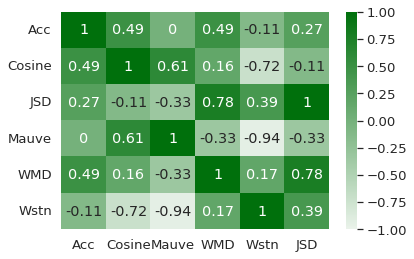

In [16]:
# Kendall Correlation
average_of_all_three(data_squad_vs, data_news_vs, data_trivia_vs, 'kendall')

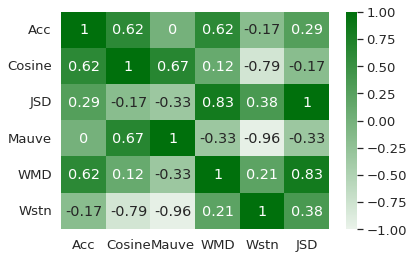

In [17]:
# Spearman Correlation
average_of_all_three(data_squad_vs, data_news_vs, data_trivia_vs, 'spearman')

##Combined

In [18]:
df_qa = data_squad_vs.append(data_news_vs)
df_qa = df_qa.append(data_trivia_vs)
df_qa

,Acc,Cosine,Mauve,WMD,Wstn,JSD
squad_squad,86.19,0.84,0.99,2.49,0.0037,0.34
squad_trivia,51.33,0.82,0.32,2.41,0.0041,0.33
squad_news,55.93,0.81,0.04,2.41,0.0059,0.33
news_news,66.25,0.89,0.91,2.15,0.0036,0.23
news_squad,77.90,0.86,0.11,2.46,0.0046,0.31
news_trivia,56.99,0.84,0.89,2.24,0.0039,0.27
trivia_trivia,66.95,0.88,0.99,2.20,0.0031,0.23
trivia_squad,52.59,0.82,0.04,2.44,0.0062,0.34
trivia_news,31.24,0.82,0.99,2.18,0.0042,0.29


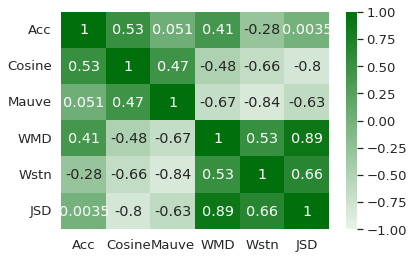

In [19]:
# pearson correlation
sns.heatmap(df_qa.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

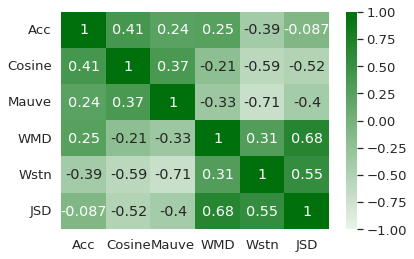

In [20]:
# kendall correlation
sns.heatmap(df_qa.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

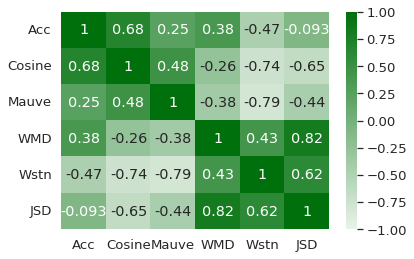

In [21]:
# spearman correlation
sns.heatmap(df_qa.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)